In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Case N=6

On the domain $[0,10]$ where $V(x) = 0$:

$$
-\frac{d^2}{dx^2}\phi(x) = E\phi(x)
$$

Applying centered difference scheme,

$$
\frac{-1}{h^2}(\phi(x - h) - 2 \phi(x) + \phi(x + h)) = E\phi(x)
$$

Discretizing in space,

$$
\frac{-1}{h^2}(\phi_{i-1} + 2 \phi_i + \phi_{i+1}) = E\phi_i
$$

where $\phi_i = \phi(x_i)$, and $i \in [0, 1, ... , N]$.

In [3]:
a = 0; b = 10; N = 6
# discretize domain [a,b] into N+1 points
x = np.linspace(a,b,N+1)
h = (b - a) / N

# generate (N-1) by (N-1) centered difference matrix scaled by 1/h^2
# dropped from N+1 points to N-1 points since boundary points are zero
A = -1 / h**2 * (np.diag(np.ones(N-2), -1) + np.diag(np.ones(N-2), 1) - 2 * np.diag(np.ones(N-1), 0))

print(A)

[[ 0.72 -0.36 -0.   -0.   -0.  ]
 [-0.36  0.72 -0.36 -0.   -0.  ]
 [-0.   -0.36  0.72 -0.36 -0.  ]
 [-0.   -0.   -0.36  0.72 -0.36]
 [-0.   -0.   -0.   -0.36  0.72]]


## Part 2 - Case N=200

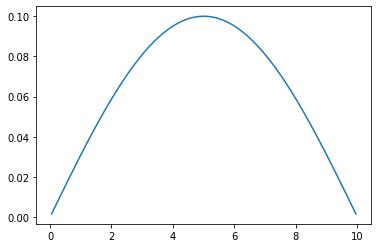

In [200]:
a = 0; b = 10; N = 200
# discretize domain [a,b] into N+1 points
x = np.linspace(a,b,N+1)
h = (b - a) / N

# generate (N-1) by (N-1) centered difference matrix scaled by 1/h^2
# dropped from N+1 points to N-1 points since boundary points are zero
A = -1 / h**2 * (np.diag(np.ones(N-2), -1) + np.diag(np.ones(N-2), 1) - 2 * np.diag(np.ones(N-1), 0))

# find the smallest eigenvalue
eigs = np.linalg.eigh(A)
E = min(eigs[0])
# get the index of the smallest eigenvalue
for i in range(len(eigs[0])):
        if eigs[0][i] == E:
            E_index = i
# get the corresponding eigenvector
eigenvector = eigs[1][:,E_index]

# plot the solution (the eigenvector)
plt.plot(x[1:-1], eigenvector)